In [7]:
import nest

dt = 0.1
tstop = 1000.
N_E = 800
N_I = 200
J = 10.
g = -4.
f_ext = 6000. # input spikes per second
p = 0.2

nest.ResetKernel()
nest.SetKernelStatus({'resolution' : dt})

neurons_E = nest.Create('iaf_psc_alpha',N_E)
neurons_I = nest.Create('iaf_psc_alpha',N_I)
noise = nest.Create('poisson_generator',params={'rate' :f_ext})

spikes_E = nest.Create('spike_detector')
spikes_I = nest.Create('spike_detector')

nest.Connect(neurons_E, neurons_E+neurons_I,
            conn_spec = {'rule' :'pairwise_bernoulli','p' : p},
            syn_spec = {'model' : 'static_synapse', 'weight' : J})
nest.Connect(neurons_I, neurons_E+neurons_I,
            conn_spec = {'rule' :'pairwise_bernoulli','p' : p},
            syn_spec = {'model' : 'static_synapse', 'weight' : J*g})
nest.Connect(noise, neurons_E+neurons_I,
            conn_spec = 'all_to_all',
            syn_spec = {'delay' : dt, 'weight' : J})
nest.Connect(neurons_E, spikes_E, conn_spec='all_to_all')
nest.Connect(neurons_I, spikes_I, conn_spec = 'all_to_all')

nest.Simulate(tstop)

In [8]:
#nest.help('poisson_generator')

In [9]:
nest.GetStatus(spikes_E)

({'binary': False,
  'close_after_simulate': False,
  'close_on_reset': True,
  'element_type': <SLILiteral: recorder>,
  'events': {'senders': array([370, 125, 139, ..., 537, 256, 344]),
   'times': array([  27.3,   27.7,   28.2, ...,  999.7,  999.8,  999.9])},
  'fbuffer_size': -1,
  'file_extension': 'gdf',
  'flush_after_simulate': True,
  'flush_records': False,
  'frozen': False,
  'global_id': 1002,
  'label': '',
  'local': True,
  'local_id': 1002,
  'model': <SLILiteral: spike_detector>,
  'n_events': 6088,
  'node_uses_wfr': False,
  'origin': 0.0,
  'parent': 0,
  'precise_times': False,
  'precision': 3,
  'record_to': (<SLILiteral: memory>,),
  'scientific': False,
  'start': 0.0,
  'stop': 1.7976931348623157e+308,
  'supports_precise_spikes': False,
  'thread': 0,
  'thread_local_id': 1001,
  'time_in_steps': False,
  'to_file': False,
  'to_memory': True,
  'to_screen': False,
  'use_gid_in_filename': True,
  'vp': 0,
  'withgid': True,
  'withport': False,
  'withrport

/home/ocnc/anaconda3/envs/ocnc2018/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Using pyplot.axes(ax) with ax an Axes argument is deprecated. Please use pyplot.sca(ax) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


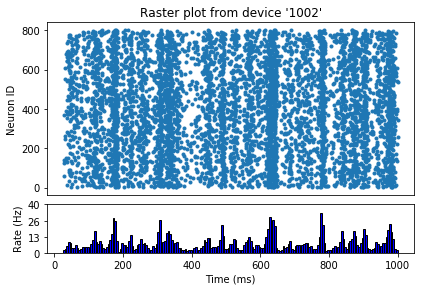

In [11]:
%matplotlib inline
import nest.raster_plot
nest.raster_plot.from_device(spikes_E)

/home/ocnc/anaconda3/envs/ocnc2018/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Using pyplot.axes(ax) with ax an Axes argument is deprecated. Please use pyplot.sca(ax) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


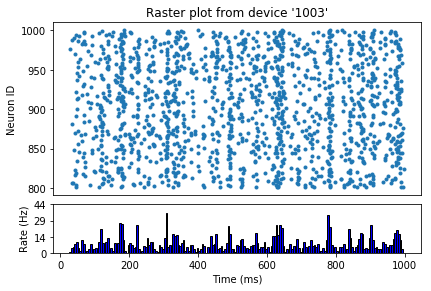

In [12]:
nest.raster_plot.from_device(spikes_I)